# LINEAR REGRESSION

- load the data
- check normality
- perform linear regression
- compute prediction
- check the residuals, cook distance ecc in order to consider the performance.

In [93]:
library(MASS)
data(Boston)
summary(Boston)
dim(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

[1] 506  14

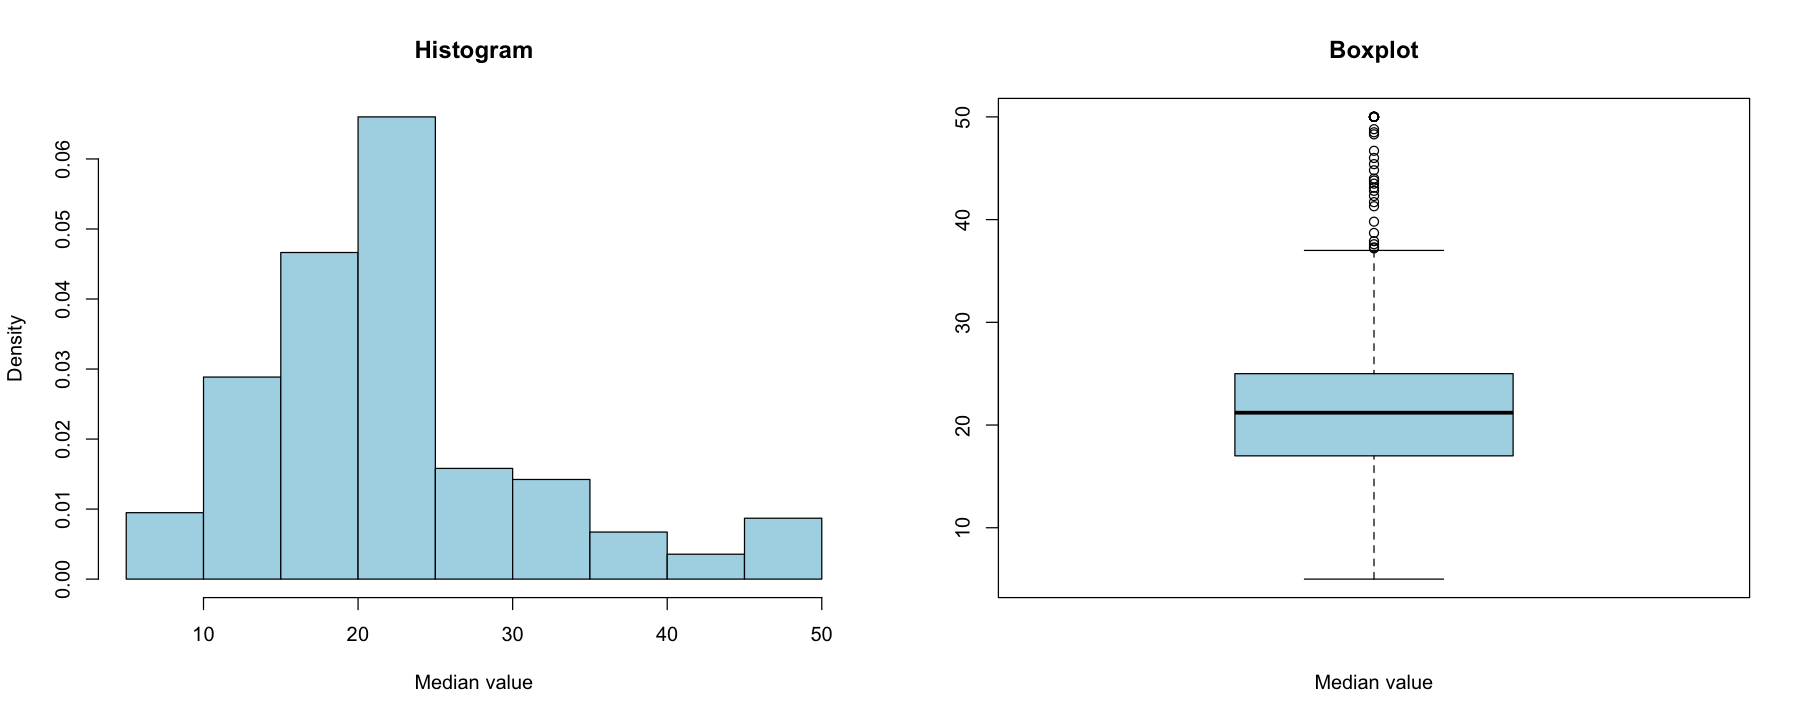

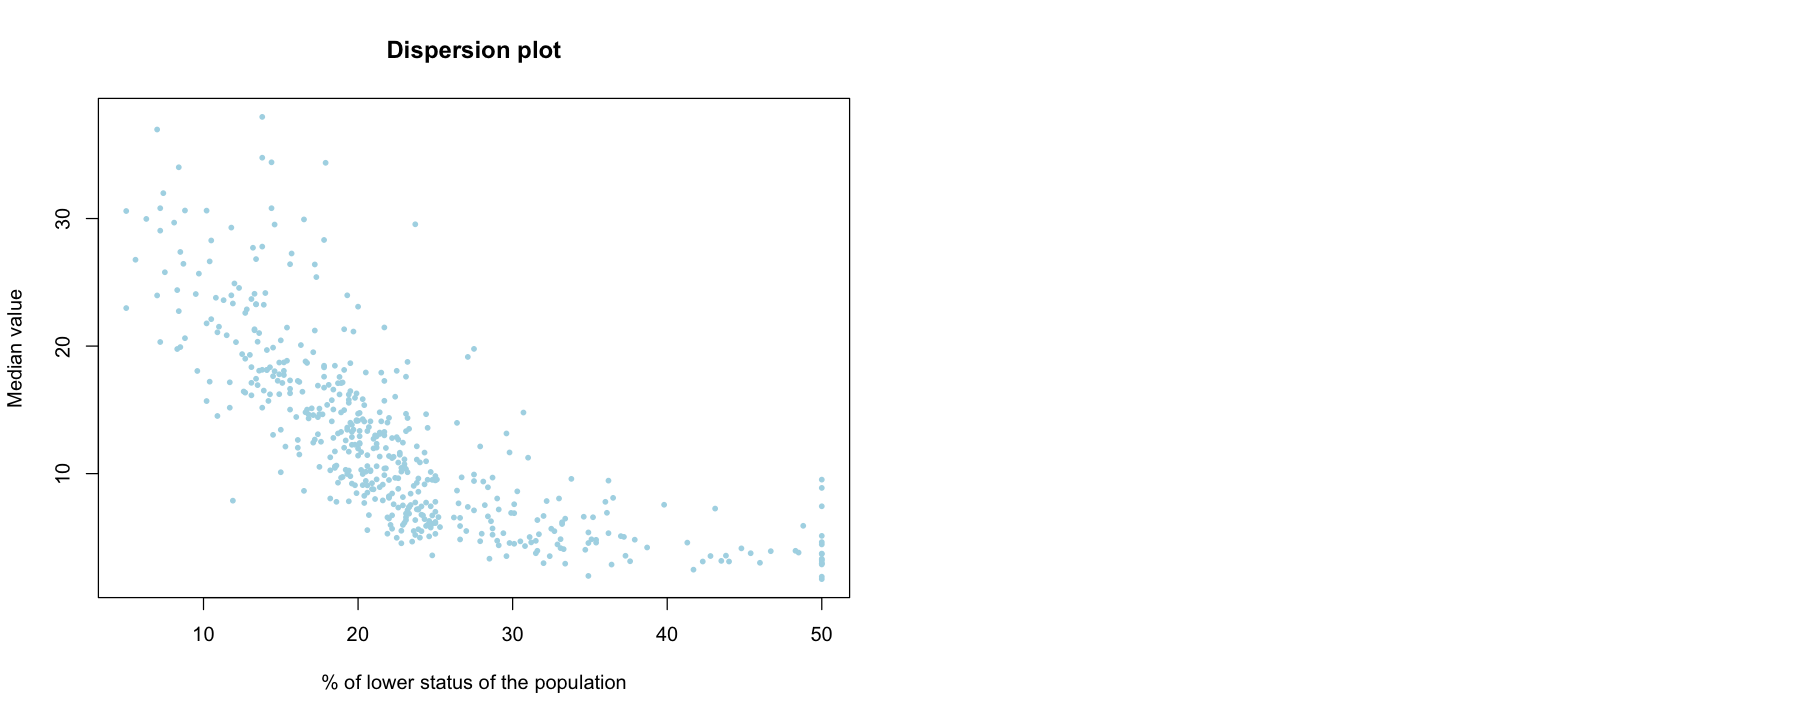

In [94]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 6)
hist(Boston$medv, prob=TRUE, xlab='Median value', main='Histogram',col="lightblue")
## boxplot of the distribution
boxplot(Boston$medv, xlab='Median value', main='Boxplot',col="lightblue" )
plot(Boston$medv, Boston$lstat, main='Dispersion plot',
        xlab='% of lower status of the population',
        ylab='Median value', pch=19, cex=0.5,col="lightblue")

In [95]:
## upload library ISLR
library(ISLR)
data(Carseats)
dim(Carseats)

## variables
names(Carseats)
my.data <- Carseats[, c('Sales', 'Price', 'Urban', 'US', 'ShelveLoc')]
my.data[1:3,]
summary(my.data)


is.factor(my.data$Urban)
## [1] TRUE
is.factor(my.data$US)
## [1] TRUE
is.factor(my.data$ShelveLoc)

[1] 400  11

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

Sales,Price,Urban,US,ShelveLoc
9.50,120,Yes,Yes,Bad
11.22,83,Yes,Yes,Good
10.06,80,Yes,Yes,Medium


     Sales            Price       Urban       US       ShelveLoc  
 Min.   : 0.000   Min.   : 24.0   No :118   No :142   Bad   : 96  
 1st Qu.: 5.390   1st Qu.:100.0   Yes:282   Yes:258   Good  : 85  
 Median : 7.490   Median :117.0                       Medium:219  
 Mean   : 7.496   Mean   :115.8                                   
 3rd Qu.: 9.320   3rd Qu.:131.0                                   
 Max.   :16.270   Max.   :191.0                                   

[1] TRUE

[1] TRUE

[1] TRUE

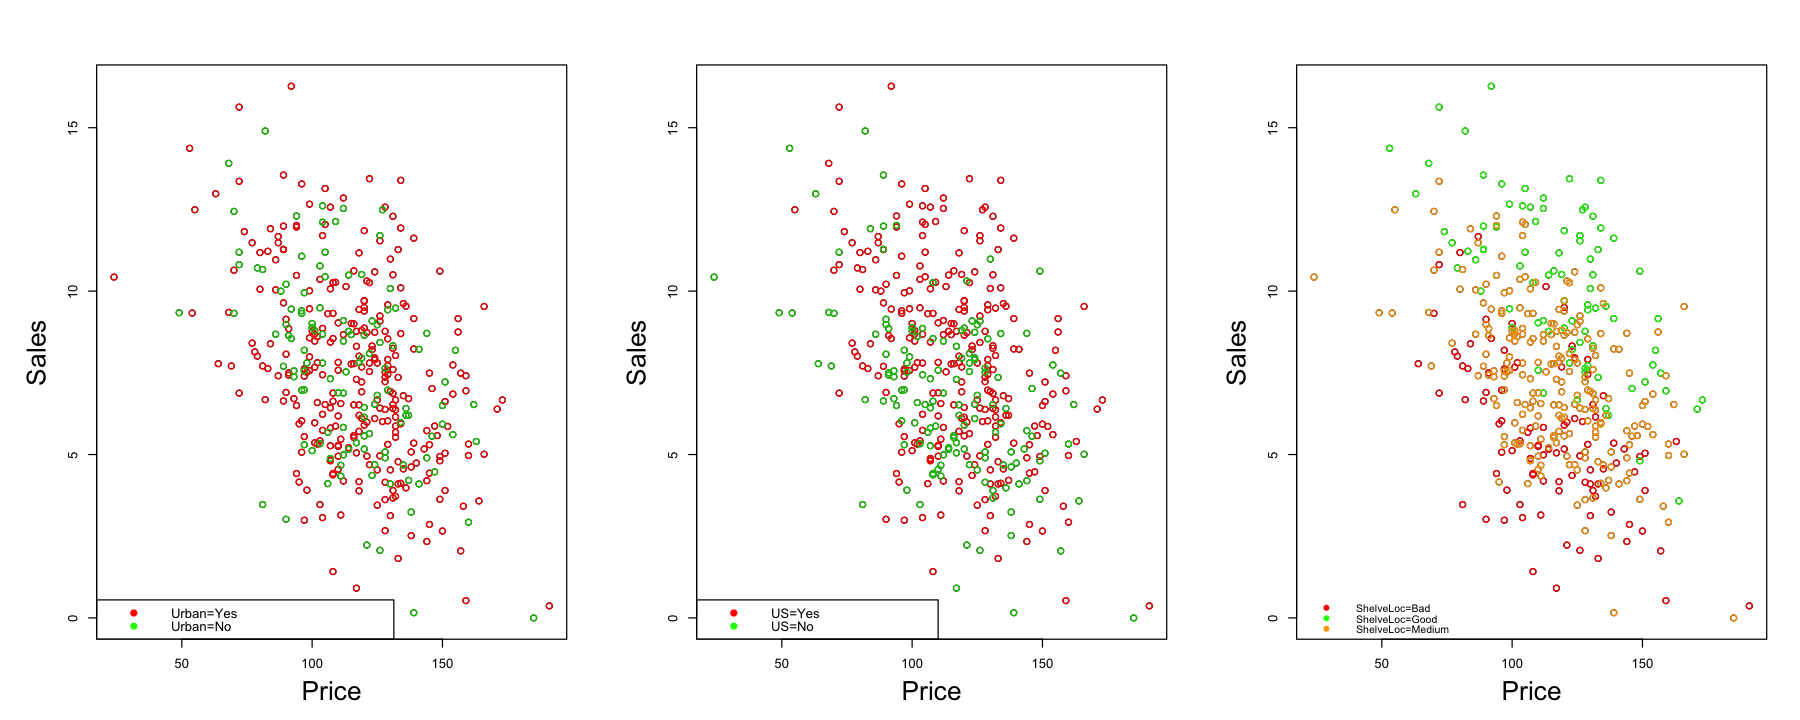

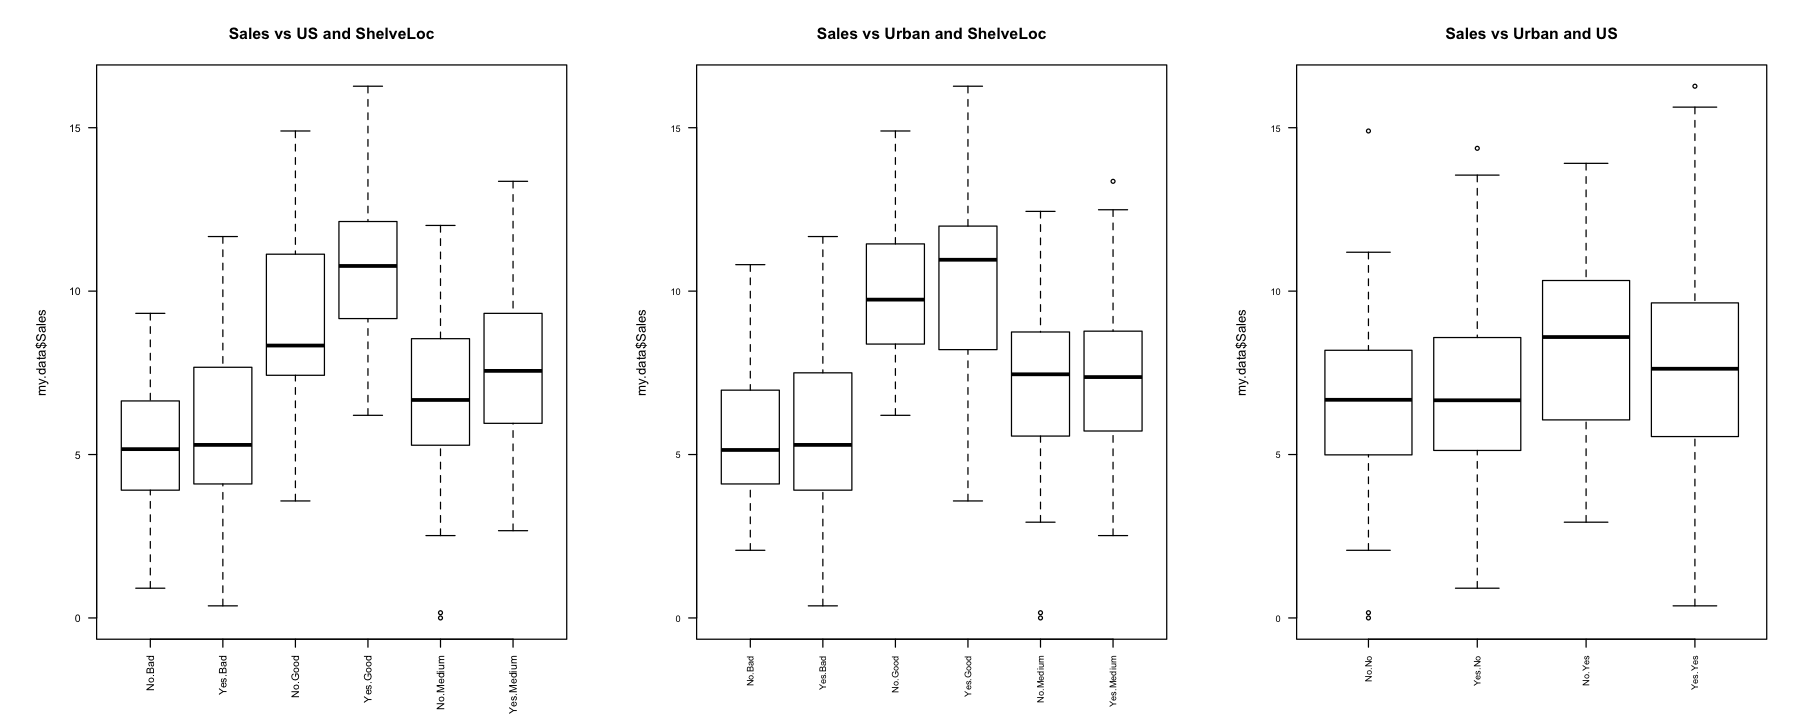

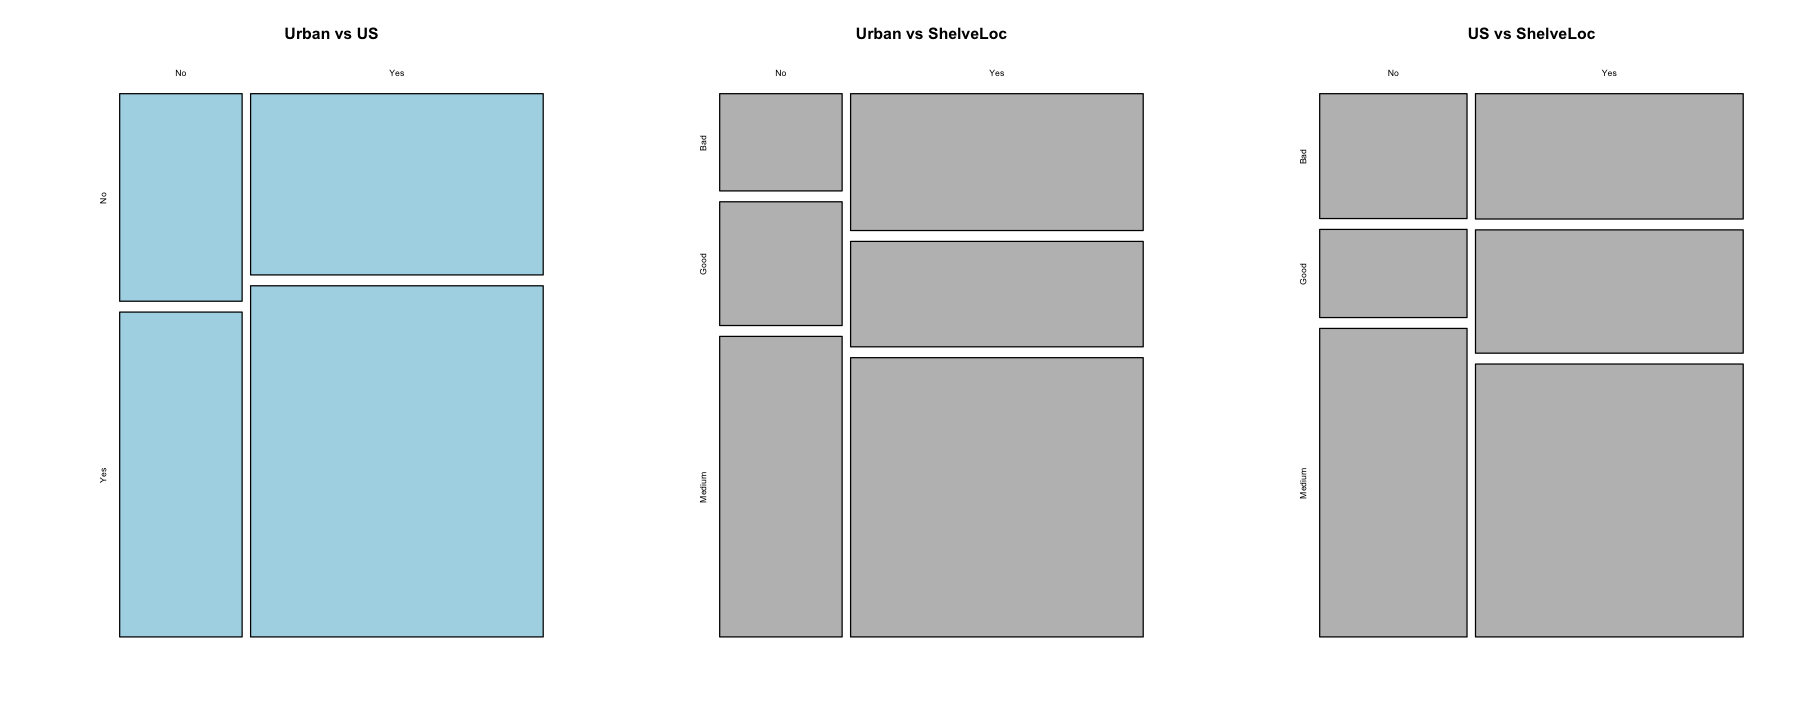

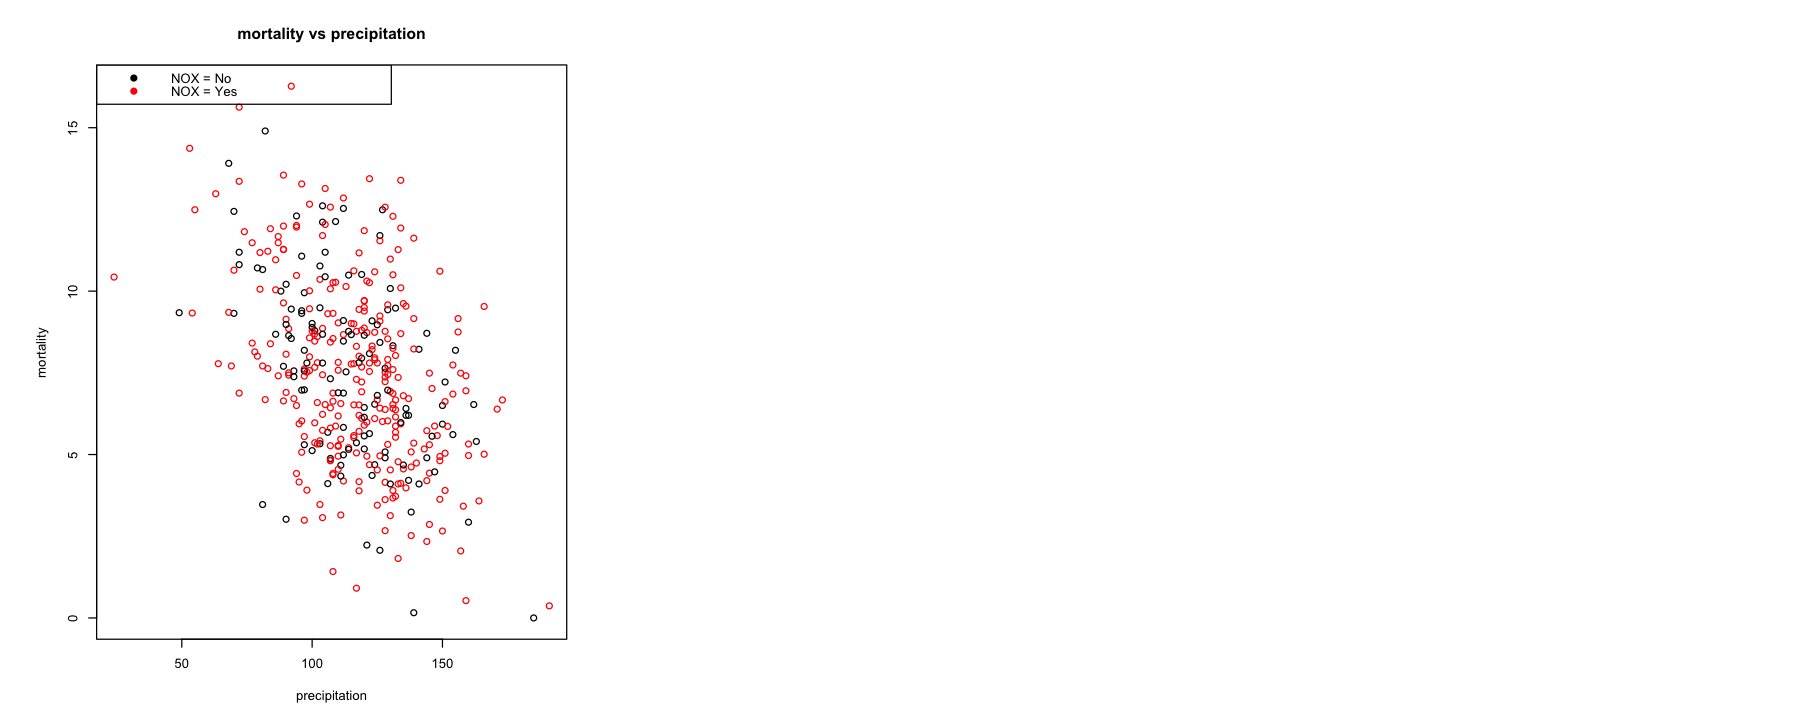

In [99]:
par(mfrow=c(1,3))
options(repr.plot.width = 15, repr.plot.height = 6)
par(mar = c(5.1, 6.1, 4.1, 2.1))

plot(my.data$Price, my.data$Sales, cex.lab=2, xlab='Price', ylab='Sales')
points(my.data$Price[my.data$Urban=='Yes'], my.data$Sales[my.data$Urban=='Yes'], col=2)
points(my.data$Price[my.data$Urban=='No'], my.data$Sales[my.data$Urban=='No'], col=3)
legend('bottomleft', col=c('red','green'), pch=c(19,19),
        legend=c('Urban=Yes','Urban=No'))

plot(my.data$Price, my.data$Sales, cex.lab=2, xlab='Price', ylab='Sales')
points(my.data$Price[my.data$US=='Yes'], my.data$Sales[my.data$US=='Yes'], col=2)
points(my.data$Price[my.data$US=='No'], my.data$Sales[my.data$US=='No'], col=3)
legend('bottomleft', col=c('red','green'), pch=c(19,19),
        legend=c('US=Yes','US=No'))


plot(my.data$Price, my.data$Sales, cex.lab=2, xlab='Price', ylab='Sales')
points(my.data$Price[my.data$ShelveLoc=='Bad'],
my.data$Sales[my.data$ShelveLoc=='Bad'], col='red')
points(my.data$Price[my.data$ShelveLoc=='Good'],
my.data$Sales[my.data$ShelveLoc=='Good'], col='green')
points(my.data$Price[my.data$ShelveLoc=='Medium'],
        my.data$Sales[my.data$ShelveLoc=='Medium'], col='orange')
legend('bottomleft', col=c('red', 'green', 'orange'), pch=c(19,19, 19),
        legend=c('ShelveLoc=Bad', 'ShelveLoc=Good', 'ShelveLoc=Medium'),
        bty='n', cex=0.8)


boxplot(my.data$Sales~ my.data$US*my.data$ShelveLoc, las=2, cex.axis=0.8,
xlab='', main='Sales vs US and ShelveLoc')
boxplot(my.data$Sales~ my.data$Urban*my.data$ShelveLoc, las=2, cex.axis=0.7,
xlab='', main='Sales vs Urban and ShelveLoc')
boxplot(my.data$Sales~ my.data$Urban*my.data$US, las=2, cex.axis=0.7, xlab='',
main='Sales vs Urban and US')

mosaicplot(table(my.data$Urban, my.data$US), main='Urban vs US',col="lightblue")
mosaicplot(table(my.data$Urban, my.data$ShelveLoc), main='Urban vs ShelveLoc')
mosaicplot(table(my.data$US, my.data$ShelveLoc), main='US vs ShelveLoc')



plot(my.data$Price, my.data$Sales, col=my.data$Urban,
        main='mortality vs precipitation', ylab='mortality',
        xlab='precipitation')
legend('topleft', legend=c('NOX = No','NOX = Yes'), col=c(1,2), pch=c(19,19))

We see that our dataset is mad of $n=..$ and $p=...$. These are its main features.

Let's also plot the histogram of ... vs ...  in order to check normality and the boxplot, otherwise let's apply a log transformation. Let also check the relationship between Y and the covariates X. From this plot we can see a inverse/direct/ no relationship between X and Y. 
Regardign the interections between variables we see from plot 2 that
The partial overlapping of the observations belonging to the two groups suggests that there would not be interactions between the covariates/ if there is no overlapping there could be interactions (SE HAI UNA COVARIATA  TIPO YES NO O DI CLASSE). The same type of conclusions can be reached analysing the boxplots and the mosaic plots (that are shown for a purpose of completeness).

In [26]:
## load the data

#mydata<-read.csv('mydata.csv', sep=',')

#or

##load("namefile.RData")
#ls()
#names(namefile)
# mydata<-namefile


## or

#mydata<-<- read.table('nome.dat')


## se vuoi estrarre variabili dai dati (perche hai solo tot covariates)
#mydata <- mydata[, c('nome1', 'nome2', 'nome3', 'nome4', 'nome5')]
#mydata[1:3,]

#summary(mydata)

#check that they are factors otherwise make it
#is.factor(my.data$nomex1)

#is.factor(my.data$nomex2)

#is.factor(my.data$nomex3)

## SE HAI VARIABILI QUALITATIVE CON DEI LIVELLI PLOTTA LA TABELLA 

#table(mydata$variabilequalitativa)

#par(mfrow=c(1,2))
#hist(mydata$Y, prob=TRUE, xlab='Y', main='Histogram',col="lightblue")
## boxplot of the distribution
#boxplot(mydata$Y, xlab='Y', main='Boxplot',col="lightblue" )





In [27]:
## plot con tutte le variabili in funzione di y per vedere eventuale relazione
#pairs(mydata,col="blue")

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
#par(mfrow=c(1,3))
#options(repr.plot.width = 15, repr.plot.height = 7)

#plot(mydata$x1, mydata$y, cex.lab=1.2, xlab='x', ylab='y',col=mydata$x1-livello)
#legend('bottomleft', col=c(1,2,.. a seconda dei livelli), pch=c(19,19),
        #legend=c('x-livello==nome-livello1','x-livello==nome-livello2',.. a seconda dei livelli))

#plot(mydata$x1, mydata$y, cex.lab=1.2, xlab='x', ylab='y',col=mydata$x2-livello)
#legend('bottomleft', col=c(1,2,.. a seconda dei livelli), pch=c(19,19),
        #legend=c('x2-livello==nome-livello1','x2-livello==nome-livello2',.. a seconda dei livelli))


#plot(mydata$x2, mydata$y, cex.lab=1.2, xlab='x', ylab='y',col=mydata$x1-livello)
#legend('bottomleft', col=c(1,2,.. a seconda dei livelli), pch=c(19,19),
        #legend=c('x1-livello==nome-livello1','x1-livello==nome-livello2',.. a seconda dei livelli))


#plot(mydata$x2, mydata$y, cex.lab=1.2, xlab='x', ylab='y',col=mydata$x2-livello)
#legend('bottomleft', col=c(1,2,.. a seconda dei livelli), pch=c(19,19),
        #legend=c('x2-livello==nome-livello1','x2-livello==nome-livello2',.. a seconda dei livelli))
....






## plot boxplot per eventuali iterazioni (basati pero sempre su quello sopra)
#boxplot(mydata$x1~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x1 vs x1-livello ')
#boxplot(mydata$x1~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x1 vs x2-livello ')
#boxplot(mydata$x2~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x2~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x2 vs x2-livello ')
#boxplot(mydata$x3~ mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='x2 vs x1-livello ')
#boxplot(mydata$x3~ mydata$x2-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main=' x3 vs x2-livello ')

## plot boxplot with respect to factors (basati pero sempre su quello sopra)
#boxplot(mydata$Y~ mydata$x2-livello*mydata$x1-livello, las=2, cex.axis=0.7,col="lighblue",
#xlab='', main='Y vs x2-livello and x1-livello ')


## plot moasic plot
#mosaicplot(table(mydata$x1, mydata$x1-livello), main='x1 vs x1-livello',col="lightblue")
#mosaicplot(table(mydata$x1, mydata$x2-livello), main='x1 vs x2-livello',col="lightblue")
#mosaicplot(table(mydata$x1-livello, mydata$x2-livello), main='x1-livello vs x2-livello',col="lightblue")

In [77]:
model.sales <- lm(Sales~Price + Urban + US + ShelveLoc + Price:ShelveLoc + Price:US +
Price:Urban + ShelveLoc:Urban + ShelveLoc:US + US:Urban, data=my.data)
summary(model.sales)


Call:
lm(formula = Sales ~ Price + Urban + US + ShelveLoc + Price:ShelveLoc + 
    Price:US + Price:Urban + ShelveLoc:Urban + ShelveLoc:US + 
    US:Urban, data = my.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7751 -1.2414  0.0041  1.1668  4.4927 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              12.696959   1.389738   9.136  < 2e-16 ***
Price                    -0.068966   0.012046  -5.725 2.08e-08 ***
UrbanYes                 -1.226559   1.110277  -1.105 0.269965    
USYes                     0.710619   1.040827   0.683 0.495179    
ShelveLocGood             4.933277   1.447735   3.408 0.000725 ***
ShelveLocMedium           1.252907   1.199916   1.044 0.297066    
Price:ShelveLocGood      -0.009771   0.011430  -0.855 0.393176    
Price:ShelveLocMedium     0.004112   0.009917   0.415 0.678662    
Price:USYes               0.001279   0.008119   0.158 0.874918    
Price:UrbanYes            0.014637   0.008910   

In [83]:
model.sales2 <- update(model.sales, .~.-Price:US)
summary(model.sales2)


Call:
lm(formula = Sales ~ Price + Urban + US + ShelveLoc + Price:Urban + 
    Price:ShelveLoc + Urban:US + Urban:ShelveLoc + US:ShelveLoc, 
    data = my.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7911 -1.2349  0.0082  1.1680  4.4819 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              12.601948   1.250439  10.078  < 2e-16 ***
Price                    -0.068096   0.010692  -6.369 5.41e-10 ***
UrbanYes                 -1.233407   1.108023  -1.113 0.266332    
USYes                     0.853184   0.513336   1.662 0.097317 .  
ShelveLocGood             4.939476   1.445371   3.417 0.000699 ***
ShelveLocMedium           1.273644   1.191165   1.069 0.285629    
Price:UrbanYes            0.014668   0.008896   1.649 0.099987 .  
Price:ShelveLocGood      -0.009871   0.011398  -0.866 0.386989    
Price:ShelveLocMedium     0.003891   0.009805   0.397 0.691720    
UrbanYes:USYes           -0.385475   0.429184  -0.898 0.369

After this preliminary analysis we can apply a linear regression. Let's start with a model with all variables and interactions and then perform model selection base ond $P-value$.

In [ ]:
#model.mydata <- lm(Y~x1*x2 + x1*x3 + x1*x4 + x2*x3+x2*x4+x3*x4 , data=mydata)
#summary(model.mydata)


## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
#model.mydata2 <- update(model.mydata, .~.-x1:x4)
#summary(model.sales2)

### ANDARE AVANTI UPDATANDO MODELLO RIMUOVENDO INTERAZIONI NON SIGNIFICATIVE FINCHE NON ARRIVI CHE TUTTE HANNO P-VALUE SOTTO 5%.

## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
#model.mydata3 <- update(model.mydata2, .~.-x3:x4)
#summary(model.mydata3)

So I started with a model including also the interactions between the covariates then the final model I have obtained is the following: METTERE MODELLO
In the table below the 95% CI for coefficients is reported.

(SE HAI UNA VARIABILE QUALITATIVA RICORDATI DI FARE LA DISTINZIONE TRA IL MODELLO CON LA VARIABILE CHE FA DA REFERENCE LEVEL(IN QUEL CASO LA METTI A 0) E IL CASO IN CUI TU ABBIA UN LIVELLO CHE NON SIA DI REFERENCE LEVEL. DI CONSEGUENZA AVRAI DA PRESENTARE UN MODELLO CHE IN VERITà HA DUE O PIù CASISTICHE)

In [ ]:
##tabella coefficienti

##confint(model.sales2)

This choice is also justify by considering the $F-statistic$, in fact we can see it from the following output:

In [ ]:
## confronti tra modelli

#anova(model.final-con eliminazione di tutto sopra ad una stella, model.iniziale)

Now we can judge also our model considering the residuals. From  the picture below we see that the residuals are.. Good/bad , COPIA DA ALTRO NOTEBOOK.
-cook distance, anomalous points ecc..


-ELIMINARE eventuale outlier -> segnati comando

In [ ]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
#par(mfrow=c(2,2))
#plot(model,col="blu")
### plot the Cook's distance
#par(mfrow=c(1,2))
#plot(model, 4,col="blu)
#plot(model, 5,col="blu)


#eliminazione outlier:
#mydata<-mydata[-which(rownames(nomeriga=="valore che è outlier"))]

#e rifare fit tutti con nuovi dati


Let's also compute some prediction based on x1=...and x2=.. and x2=..

(NB INSERIRE COEFFICIENTE RELATIVO AL LIVELLO NEL CASO RICHIESTO)

In [ ]:
## ESTIMATE

#estimate <- coef(model.bestmodel)

#estimate[1]+estimate[2]*valore_x_dato+ eventuali altre covariate qualitative/ecc a seconda della richiesta

If we try with a polynomial in ... we obtain the following output, so is/is not useful to insert a polynomial term:

In [ ]:
#summary(update(model.bestmodel, .~.+I(nome_variabile_che_vuoi_in _polinomiale^2)))

Now let's use  , as said before, the smoothing splines for the variables that are not linear. In order to find the degrees of freedom I have used the cross validation. (NOTA BENE CON X1.CV riesci a trovare i degree of freedom (arrotonda per eccesso) da mettere poi nella funzione gam per fare il fit nuovo con la smoothing splines

In [ ]:
#set.seed(111)
#library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
#x1.cv = smooth.spline(x= mydata$x1, y=mydata$y, cv=TRUE)
#x1.cv 
#x2.cv = smooth.spline(x= mydata$x2, y=mydata$y, cv=TRUE)
#x2.cv 


## primo fit considerando le variabili splines smooth
#m.gam <- gam(y ~ x3 + s(x1, degree of freedoms find before) + s(x2,degree of freedoms find before) 
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
#        data=mydata)
#summary(m.gam)


## Secondo fit considerando le variabili splines smooth
#m.gam2 <- gam(y ~ x3 + s(x1, degree of freedoms find before)/x1 dipende se hai tenuti i no smoothline + s(x2,degree of freedoms find before) + ..... altre variabili del best model,
#        data=mydata)
#summary(m.gam2)

##plot m.gam finale
#par(mfrow=c(1,4))
#plot(m.gam finale, se=TRUE)

From the output,based on $P-value$ we see that we do/ don't need smoothing splines for x1 (DEVI GUARDARE "ANOVA FOR NON PARAMETRIC EFFECTS" SE HAI LE STELLINE HAI BISOGNO DELLA SMOOTHING SPLINES ALTRIMENTI NO. IN PARTICOLARE FAI UNA SELEZIONE USANDO GAM CIOè PRIMA CONSIDERA TUTTE , POI ELIMINANE UNA CHE NON HA P-VALUE MINORE 5% E FAI UN ALTRA GAM E VEDI SE L ALTRA VARIABILE VA TENUTA E COSI VIA, FINCHè NON TROVI M.GAM FINALE MIGLIORE. )

Furthermore from the plot we see that.. COMPLETARE GUARDANDO LEZIONE...

In the following plot we there are the  predictions based on this model.

In [ ]:
### plot prediction

#plot(mydata$Y, predict(m.gam best), xlab='log(Y)', ylab='Predictions',
#        pch='.', main='Smoothing splines', ylim=c(5, 11))
#abline(0, 1, col='red', lwd=2)

In [85]:
model <- lm(medv ~ lstat, data=Boston)
model


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [29]:
### linear regression
#model <- lm(nome Y ~ nome x, data=mydata)
#summary(model)

We can see many results from the output above such as test F for the significance of all the parameters,information about the accuracy of the model,estimate, standard error, significance test on the parameters and information about residuals.
In particular we see that the p-value for the parameters ... is good/bad meaning that.. We also see the confint  95% for the parameters.

Let's plot the fitted values.

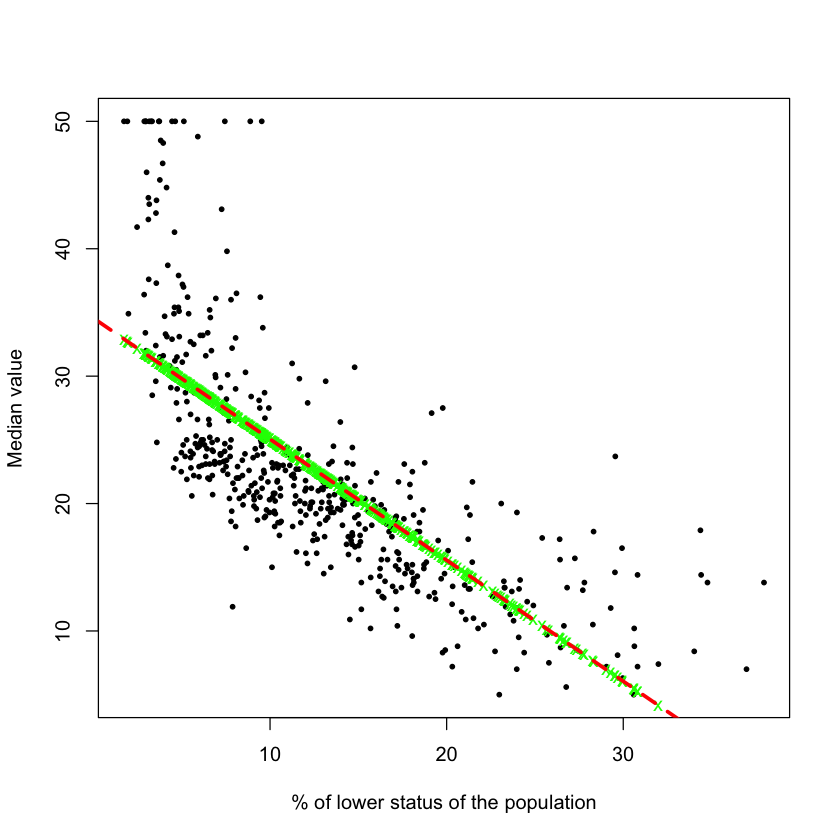

In [30]:
est.values <- fitted(model)

plot(Boston$lstat, Boston$medv, pch=19, cex=0.5,
        xlab='% of lower status of the population', ylab='Median value')
## add on the estimated values
points(Boston$lstat, est.values, pch='x', col='green') ## add on the least squares regression line

abline(coef(model)[1], coef(model)[2], lty=2, col='red', lwd=3) ## equal to
## abline(beta0, beta1, lty=2, col='red')
## lty=2 specifies dashed line (defaulting to lty=1 solid line) ## lwd=3 specifies line width (defaulting to lwd=1)

In [31]:
### estimated values

#est.values <- fitted(model)
#plot(mydata$x, mydata$y, pch=19, cex=0.5,
       # xlab='x', ylab='y',col="blue")
## add on the estimated values
#points(Bmydata$x, est.values, pch='x', col='green') ## add on the least squares regression line

#abline(coef(model)[1], coef(model)[2], lty=2, col='red', lwd=3) ## equal to
## abline(beta0, beta1, lty=2, col='red')
## lty=2 specifies dashed line (defaulting to lty=1 solid line) ## lwd=3 specifies line width (defaulting to lwd=1)

In [32]:
## Predictions with prediction interval
predict(model, newdata=data.frame(list(lstat=c(5, 10, 25))),
        interval='prediction')

fit,lwr,upr
29.80359,17.565675,42.04151
25.05335,12.827626,37.27907
10.80261,-1.457504,23.06272


Let's also compute the prediction on a new dataset considering also the interval.

In [ ]:
## Predictions with prediction interval
#predict(model, newdata=data.frame(list(x=c(5, 10, 25))),
        #interval='prediction')

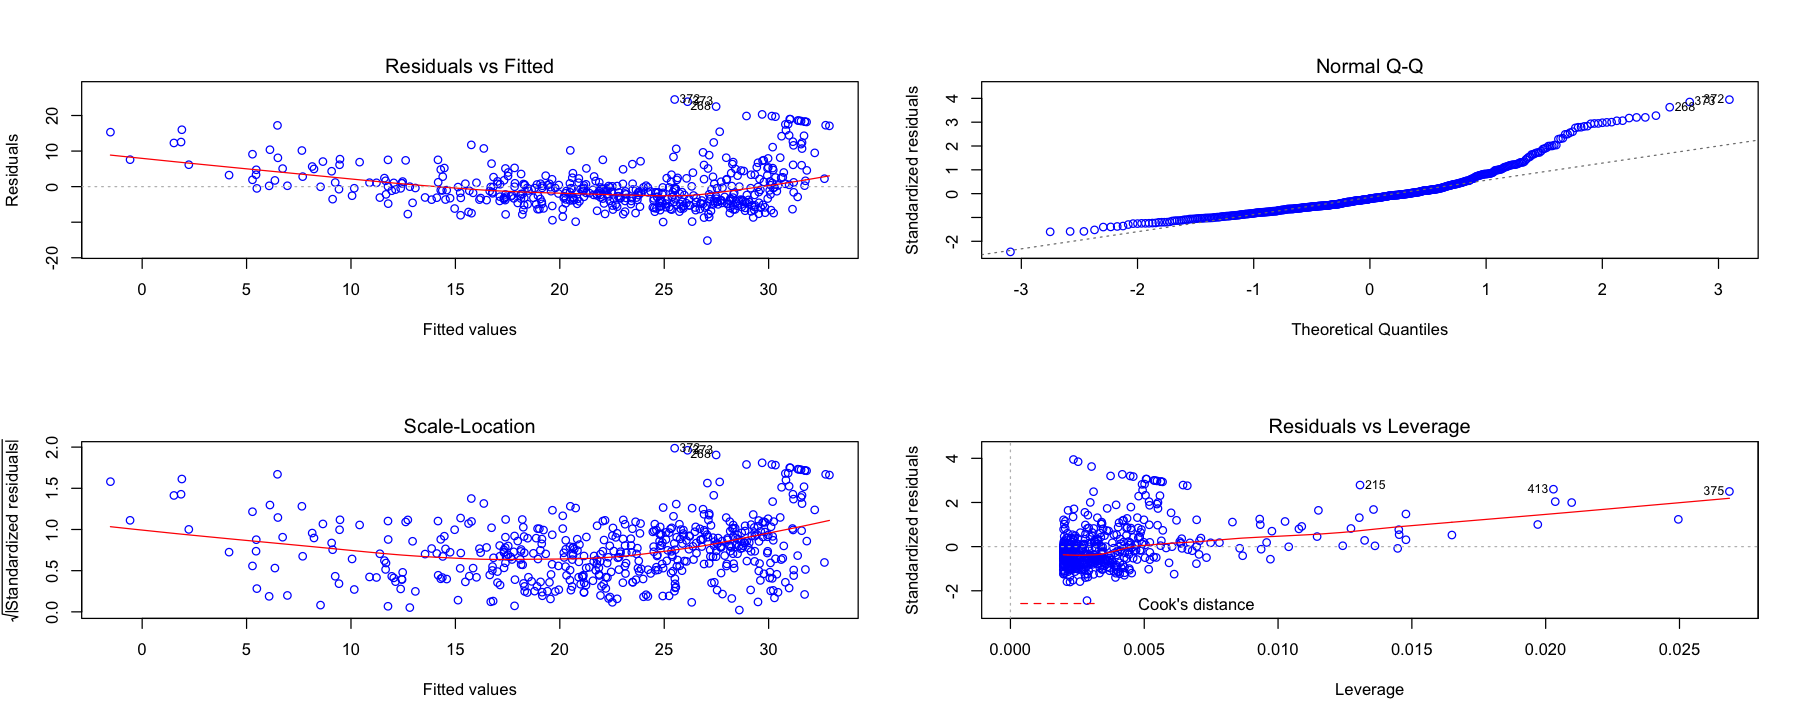

In [86]:
# subdivide the window into 4 parts, 2 rows and 2 columns
par(mfrow=c(2,2))
plot(model,col="blue")

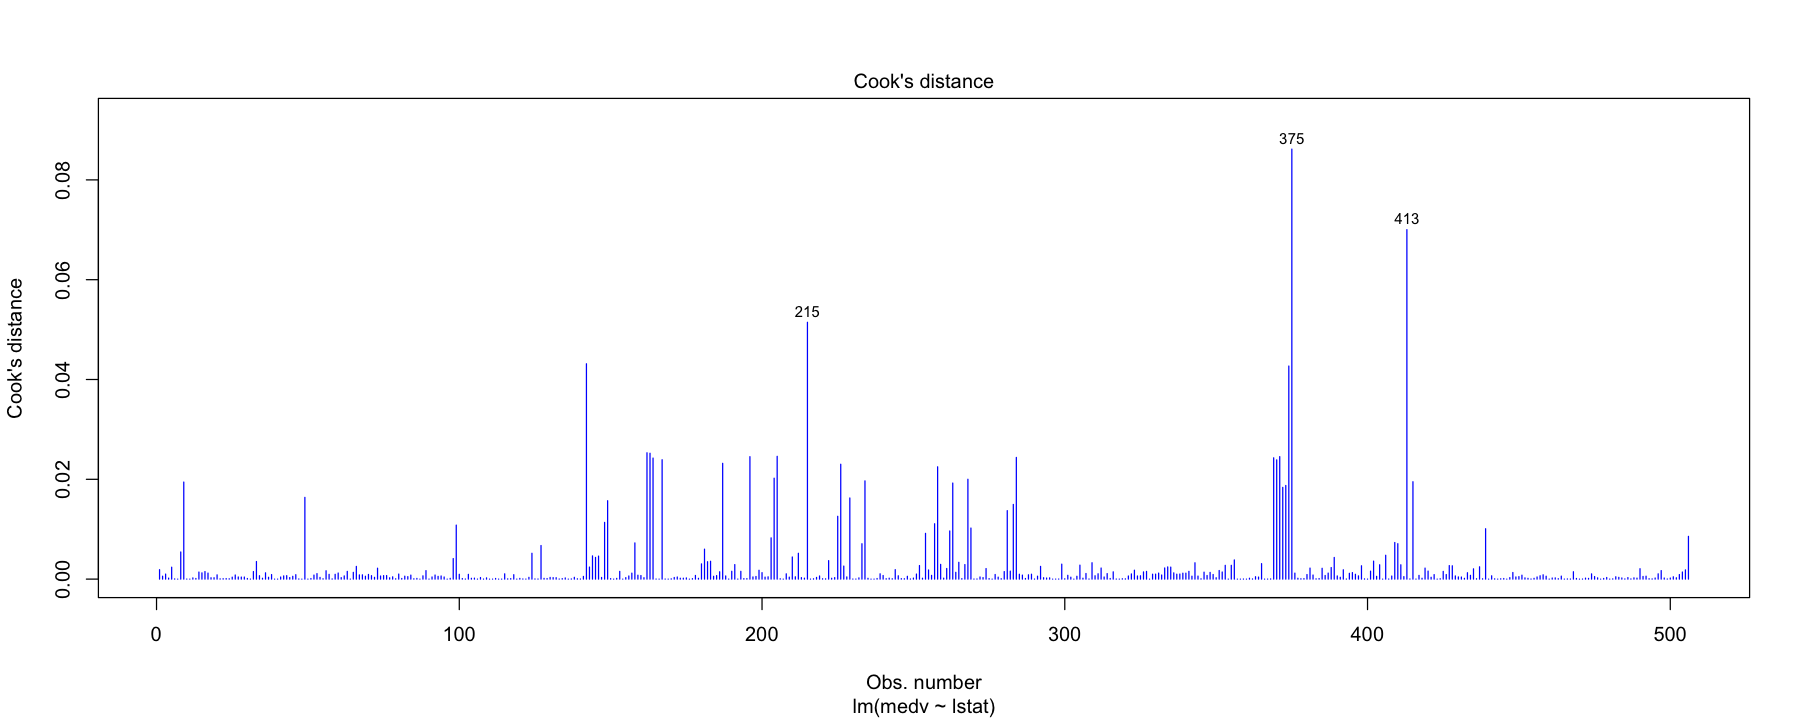

In [87]:
## plot the Cook's distance
plot(model, col="blue",4)

Now we can judge also our model considering the residuals. From the picture we see that the residuals are.. Good/bad , COPIA DA ALTRO NOTEBOOK.
-cook distance, anomalous points ecc..

In [ ]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
#par(mfrow=c(2,2))
#plot(model)
### plot the Cook's distance
#par(mfrow=c(1,2))
#plot(model, 4)
#plot(model, 5)

# MULTIPLE LINEAR REGRESSION
- plot the possible combination of x with y
- perform the regression

In [ ]:
Let's perform a multiple linear regression, considerign the covariates:..

In [39]:
model.mv <- lm(medv ~ lstat + crim, data=Boston)
summary(model.mv)


Call:
lm(formula = medv ~ lstat + crim, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.234  -3.987  -1.513   2.138  25.017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.31921    0.57374  59.816   <2e-16 ***
lstat       -0.91139    0.04339 -21.004   <2e-16 ***
crim        -0.07045    0.03602  -1.956   0.0511 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.198 on 503 degrees of freedom
Multiple R-squared:  0.5476,	Adjusted R-squared:  0.5458 
F-statistic: 304.4 on 2 and 503 DF,  p-value: < 2.2e-16


In [ ]:
## multiple regression
#model.mv <- lm(Y ~ x1 +  x2 , data=mydata)
#summary(model.mv)

# POLYNOMIAL REGRESSION
- plot the possible combination of x with y
- perform the regression
- compare the model with anova() (NEL REPORT NON DEVI RIPORTARE TUTTI I MODELLI MA SOLO QUELLO GRANDE INIZIALE, POI DI CHE HAI FATTO UNA SELEZIONE BASATA SU P-VALUE E RIPORTA MODELLO FINALE)

We can also perform the polynomial regression.

In [40]:
model2 <- lm(medv ~ lstat + I(lstat^2), data=Boston)
summary(model2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [ ]:
## plynomial regression
#model2 <- lm(y ~ x1 + I(x2^2), data=Boston)
#summary(model2)

In [ ]:
## perform selection model
#anova(model, model2)

We have performed a model selection considering P-value and the final model is the following, with the associated residuals

In [42]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
#par(mfrow=c(2,2))
#plot(bestmodel)